<a href="https://colab.research.google.com/github/RafaelHPS/QuarentenaDados/blob/master/QuarentenaDados_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [29]:
# Dados do dicionário do ENEM
faltou = 0
presente = 1
eliminado = 2

dados_notas = dados.copy()

colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

dados_notas.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0 # dados[dados['TP_PRESENCA_CN'] == presente]['NU_NOTA_CN'].mean()
dados_notas.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0
dados_notas.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0
dados_notas.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0
#dados_notas.loc[dados['TP_STATUS_REDACAO'].isin([faltou, eliminado]), 'NU_NOTA_REDACAO'] = 0

dados_notas = dados_notas[colunas_de_notas]


dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [4]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.87,0.87,0.96,0.80
ciencias_humanas,0.87,1.00,0.98,0.86,0.86
linguagem_codigo,0.87,0.98,1.00,0.86,0.86
matematica,0.96,0.86,0.86,1.00,0.80
redacao,0.80,0.86,0.86,0.80,1.00


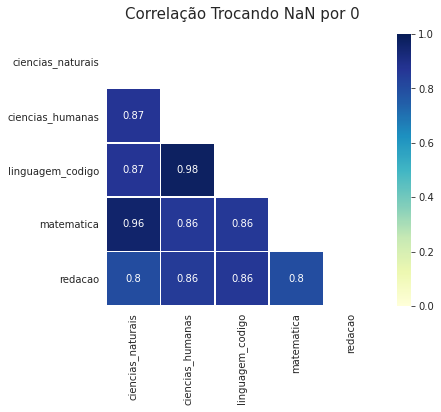

In [5]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(7, 5))
  ax.set_title("Correlação Trocando NaN por 0", pad=15, fontsize=15)
  ax = sns.heatmap(corr, mask=mask, vmax=1.0,vmin=0, square=True,  linewidths=.5, cmap="YlGnBu", annot=True)


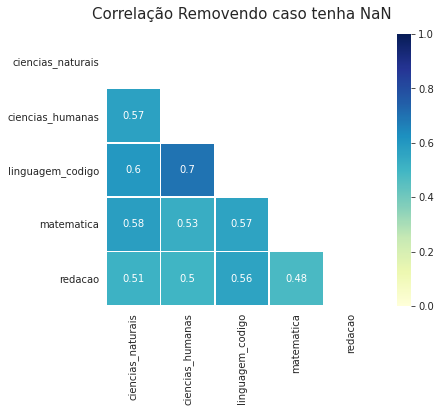

In [6]:

dados_notas_rem_nan = dados[colunas_de_notas].dropna()
dados_notas_rem_nan.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
corr_rem_nan = dados_notas_rem_nan.corr()

mask = np.zeros_like(corr_rem_nan)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(7, 5))
  ax.set_title("Correlação Removendo caso tenha NaN", pad=15, fontsize=15)
  ax = sns.heatmap(corr_rem_nan, mask=mask, vmax=1.0,vmin=0, square=True,  linewidths=.5, cmap="YlGnBu", annot=True)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [21]:
dados_notas_copia = dados.copy()

dados_notas_copia['NU_RESPOSTAS_CORRETAS_CN'] = dados_notas_copia.apply(conta_acertos, materia='CN', axis=1)
dados_notas_copia['NU_RESPOSTAS_CORRETAS_CH'] = dados_notas_copia.apply(conta_acertos, materia='CH', axis=1)
dados_notas_copia['NU_RESPOSTAS_CORRETAS_LC'] = dados_notas_copia.apply(conta_acertos, materia='LC', axis=1)
dados_notas_copia['NU_RESPOSTAS_CORRETAS_MT'] = dados_notas_copia.apply(conta_acertos, materia='MT', axis=1)

dados_notas_copia

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,NU_RESPOSTAS_CORRETAS_CN,NU_RESPOSTAS_CORRETAS_CH,NU_RESPOSTAS_CORRETAS_LC,NU_RESPOSTAS_CORRETAS_MT
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A,0,0,0,0
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D,11,27,33,22
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E,8,9,8,6
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A,7,10,11,10
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,180012079549,2018,4202305,Biguaçu,42,SC,21.00,F,0.00,1,1,"4,205,407.00",Florianópolis,42.00,SC,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,D,B,B,3,E,A,B,C,B,A,B,A,A,A,B,A,B,B,A,B,C,A,A,B,A,A,0,0,0,0
137840,180008900183,2018,2111300,São Luís,21,MA,22.00,F,0.00,1,1,"2,111,300.00",São Luís,21.00,MA,1,2,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,120.00,60.00,60.00,120.00,20.00,380.00,E,E,A,A,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,7,11,13,13
137841,180013130388,2018,2208650,Queimada Nova,22,PI,18.00,M,0.00,3,1,"2,208,650.00",Queimada Nova,22.00,PI,1,1,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,F,A,A,4,A,A,B,B,A,B,B,A,B,A,A,A,A,B,B,A,C,A,B,B,A,A,0,0,0,0
137842,180009618129,2018,2805703,Propriá,28,SE,28.00,F,0.00,1,1,"2,931,905.00",T

In [7]:
colunas_respostas = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']

colunas_gabarito = ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']

dados_respostas['Respotas'] = 


dados_respostas.head()


,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
0,NaN,NaN,NaN,NaN
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA
4,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd
df=pd.DataFrame({"string1":['CA','MI','AZ','NY'],"string2":['CA','MA','FL','NY']})

teste = pd.DataFrame({})
teste2 = pd.DataFrame({})

#df_common=df[df[["string1","string2"]].apply(lambda x : x[0]==x[1],axis=1)].reset_index(drop=True).copy()

simon_pattern = "maps"
user_pattern = "mxpm"

df['score'] = sum(a==b for mat1 in df for a, b in zip(mat1['string1'], mat1['string2']))

user_pattern = list(simon_pattern)
user_pattern

teste["c"] = list(range(10,19))
teste["b"] = list(range(20,29))
teste["d"] = list(range(30,39))
teste["e"] = list(range(40,49))

teste.columns = list(range(1,5))


teste2["c"] = list(range(40,49))
teste2["b"] = list(range(20,29))
teste2["d"] = list(range(30,39))
teste2["e"] = list(range(10,19))

teste2.columns = list(range(1,5))


teste2

TypeError: ignored

In [0]:
dados_respostas['TX_RESPOSTAS_CN'].str.extract(r'([A-Z])*',expand=True)
#dados_respostas['TX_RESPOSTAS_CN'].head()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.